## **Оглавление**
* [Предварительный обзор данных](#Предварительный-обзор-данных)
* [Графическое исследование](#Графическое-исследование)
* [Ресемплирование временного ряда](#Ресемплирование-временного-ряда)
* [Вывод](#Вывод)

In [48]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set(rc={'figure.figsize':(12, 3)})

In [12]:
url = 'https://uploads.hb.cldmail.ru/asset/1379171/attachment/5014b18ef2fef2c77fe5259edb39f696.xlsx'
data = pd.read_excel(url)

### Предварительный обзор данных

In [13]:
data.head(3)

,Дата,Значение
0,2014-05-01,0
1,2014-05-02,10
2,2014-05-03,0


In [14]:
data.tail(3)

,Дата,Значение
1458,2018-04-28,1
1459,2018-04-29,1
1460,2018-04-30,2


In [15]:
data.dtypes

Дата        datetime64[ns]
Значение             int64
dtype: object

In [33]:
data.describe()

,Значение,Год,Месяц
count,1461.000000,1461.000000,1461.000000
mean,2.619439,2015.828884,6.522930
std,2.624230,1.212724,3.449884
min,0.000000,2014.000000,1.000000
25%,1.000000,2015.000000,4.000000
50%,1.000000,2016.000000,7.000000
75%,4.000000,2017.000000,10.000000
max,10.000000,2018.000000,12.000000


#### Сделаем индексом поле "Дата". В таком виде удобно работать в pandas c временными рядами.

In [16]:
data.set_index('Дата', inplace=True)

In [17]:
data.head(3)

,Значение
Дата,
2014-05-01,0
2014-05-02,10
2014-05-03,0


#### Добавим столбцы с информацией из поля "Дата". В таком виде будет удобно работать с рядом.

In [18]:
data["Год"] = data.index.year
data["Месяц"] = data.index.month
data["День недели"] = data.index.weekday_name

In [19]:
data.sample(5, random_state=0)

,Значение,Год,Месяц,День недели
Дата,,,,
2015-10-13,1,2015,10,Tuesday
2016-02-17,3,2016,2,Wednesday
2015-08-03,1,2015,8,Monday
2015-02-04,7,2015,2,Wednesday
2016-02-16,3,2016,2,Tuesday


### Графическое исследование

#### График всего временного ряда c 2014-05-01 по 2018-04-30	 гг.

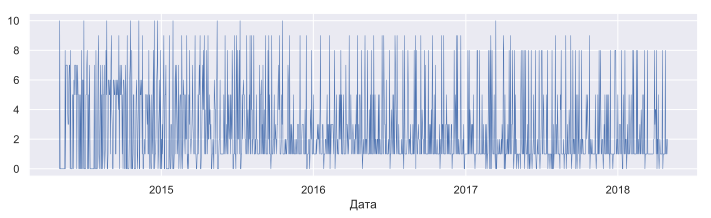

In [49]:
data['Значение'].plot(linewidth=0.5);

#### На Графике не видно какой-то определенной тенденции. Посмотрим в меньшем масштабе. Например, за год.

#### 2014

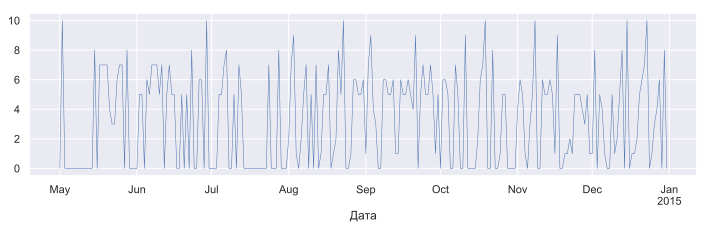

In [52]:
data.loc['2014','Значение'].plot(linewidth=0.5);

#### 2015

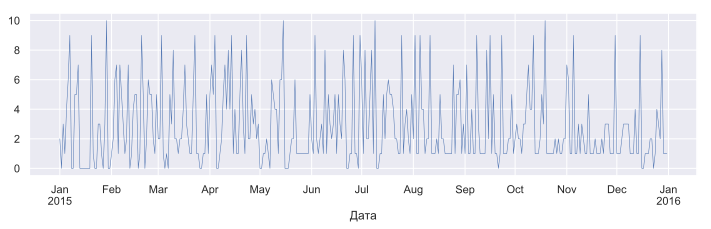

In [53]:
data.loc['2015','Значение'].plot(linewidth=0.5);

#### 2016

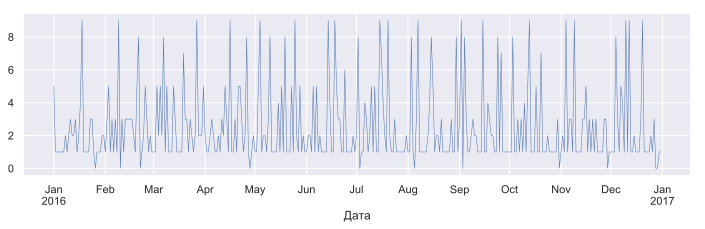

In [54]:
data.loc['2016','Значение'].plot(linewidth=0.5);

#### 2017

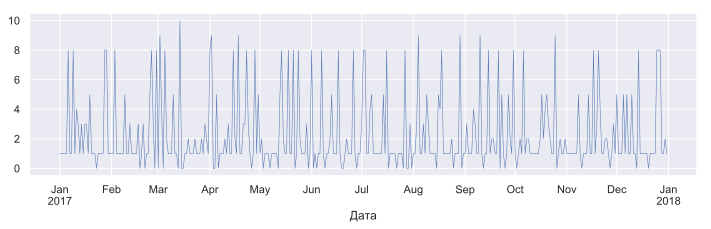

In [57]:
data.loc['2017','Значение'].plot(linewidth=0.5);

#### 2018

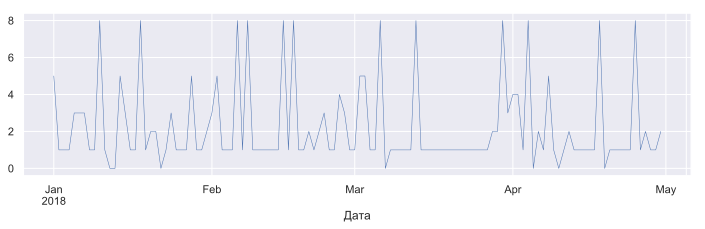

In [58]:
data.loc['2018','Значение'].plot(linewidth=0.5);

#### Также не прослеживается какая-то определенная тенденция.

#### Посмотрим за несколько месяцев

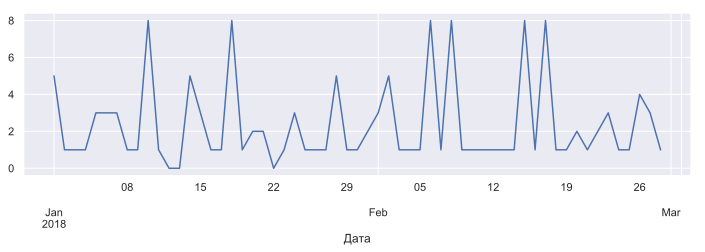

In [76]:
data.loc['2018-01':'2018-02', 'Значение'].plot()

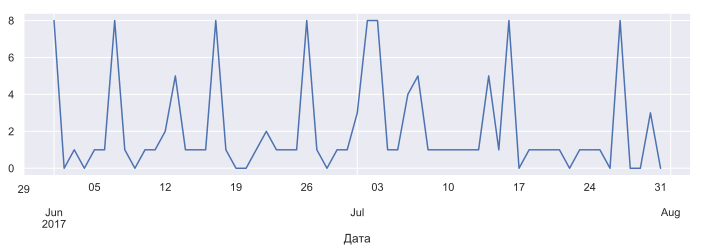

In [78]:
data.loc['2017-06':'2017-07', 'Значение'].plot()

#### Нет очевиднойого тренда или закономерности.

#### Рассмотрим статистику за год по месяцам

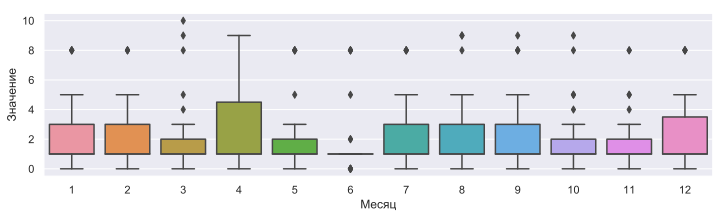

In [65]:
sns.boxplot(data.loc['2017', 'Месяц'], data['Значение']);

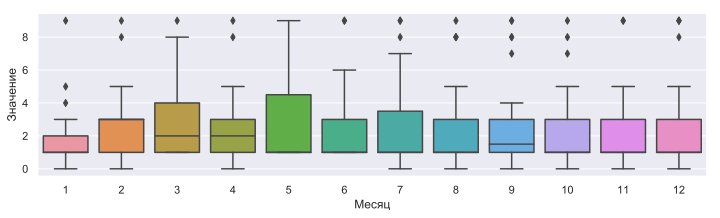

In [66]:
sns.boxplot(data.loc['2016', 'Месяц'], data['Значение']);

#### По дням

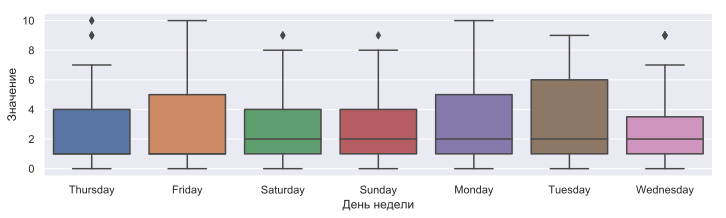

In [72]:
sns.boxplot(data.loc['2015', 'День недели'], data.loc['2015', 'Значение']);

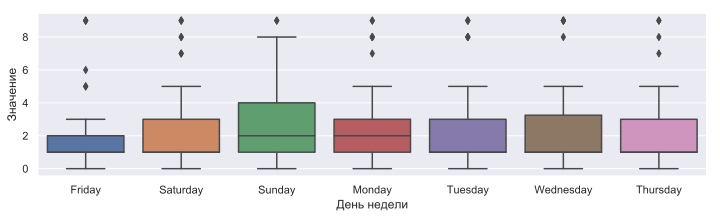

In [69]:
sns.boxplot(data.loc['2016', 'День недели'], data.loc['2016', 'Значение']);

#### По-прежнему не прослеживается какого-то определенного тренда.

### Ресемплирование временного ряда

#### Напоследок выполним ресемплинг. Это позволит уменьшить дисперсию и построить более гладкий график по данным

In [100]:
# среднее за неделю
data_weekly_mean = data['Значение'].resample('W').mean()
data_weekly_mean.head(3)

Дата
2014-05-04    2.500000
2014-05-11    0.000000
2014-05-18    3.142857
Freq: W-SUN, Name: Значение, dtype: float64

In [101]:
# среднее за месяц
data_monthly_mean = data['Значение'].resample('W').mean()
data_monthly_mean.head(3)

Дата
2014-05-04    2.500000
2014-05-11    0.000000
2014-05-18    3.142857
Freq: W-SUN, Name: Значение, dtype: float64

#### 2017

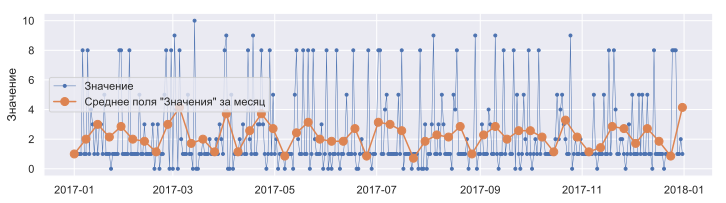

In [110]:
start, end = '2017-01', '2017-12'
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Значение'], \
        marker='.', linestyle='-', linewidth=0.5, label='Значение')
ax.plot(data_monthly_mean.loc[start:end], \
        marker='o', markersize=8, linestyle='-', label='Среднее поля "Значения" за месяц')
ax.set_ylabel('Значение')
ax.legend();

#### 2016

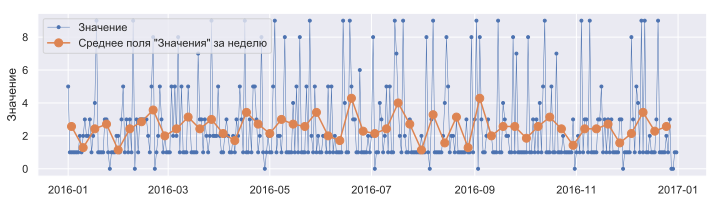

In [109]:
start, end = '2016-01', '2016-12'
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Значение'], \
        marker='.', linestyle='-', linewidth=0.5, label='Значение')
ax.plot(data_weekly_mean.loc[start:end], \
        marker='o', markersize=8, linestyle='-', label='Среднее поля "Значения" за неделю')
ax.set_ylabel('Значение')
ax.legend();

## Вывод 

**Исследования предоставленных данных не выявили каких-то закономерностей переменной "Значение".  Не наблюдается ни спадающего тренда, ни восходящего.**